In [1]:
import networkx as nx
import osmnx as ox
import functions
import Path_finder
import Car_generator as cg

In [2]:
# This location is 1 km round the location : 
G = ox.project_graph(ox.graph_from_point((-0.16509, -78.47888 ), dist=1000, network_type='drive'))
G = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

# get data frame
df = nx.to_pandas_edgelist( G )

#get list of nodes
list_nodes = list(G.nodes)

In [4]:
num_agents = 2

rutas = []

# creando lista de rutas


for i in range(num_agents):

    i , f  = functions.choose_route(list_nodes , G)

    rutas.append((i,f))

#rutas


In [10]:
agents = []
 
for j in range( len(rutas)):

    agent = cg.Agent(j, rutas[j][0], rutas[j][1], G , df)
    
    agents.append(agent)
    
    # estado 0 para inicicarl a simulacion
    agents[j].state = 0
    agents[j].current_node = agents[j].initial_node

In [11]:
agents

In [12]:

# run the simulation for each agent
time = 0

# guardar los agnetes que finalizaron simulacion y el tiempo 
finish_agents = {}

finish_agents_time = []

finish_list = agents.copy() 

while  len(finish_list) != 0 :

    for agente in finish_list:

        a = agente.sim(time)

    for agente in finish_list:

        if agente.state == 1:
            if agente not in finish_agents:
                finish_agents[agente.agent_id] = time
                print("el agente %d termino la simulacion en %d segundos" %( agente.agent_id, time ))
                finish_list.remove(agente)
                
            elif agente in finish_agents:
                pass
                    
    time += 1

# checkear tiempo de cada agente
for a in list(finish_agents.keys()):
    tiempo_de_viaje = functions.calculadora(finish_agents[a])
    print("el agente %d se demoro " %( a) , tiempo_de_viaje )


soy el agente  0
Debo ir del nodo 120 al nodo 239
la ruta que voy a seguir es  [120, 119, 112, 115, 123, 125, 141, 364, 142, 86, 346, 347, 44, 40, 39, 43, 42, 81, 80, 76, 79, 235, 244, 245, 280, 241, 240, 83, 237, 239]
soy el agente  1
Debo ir del nodo 218 al nodo 321
la ruta que voy a seguir es  [218, 222, 224, 225, 227, 229, 230, 234, 284, 285, 283, 328, 357, 319, 359, 324, 323, 321]
llegue al nodo  222
llegue al nodo  119
llegue al nodo  224
llegue al nodo  112
llegue al nodo  225
llegue al nodo  227
llegue al nodo  229
llegue al nodo  115
llegue al nodo  230
el nodo  230  es un semaforo
me voy a detener por 48  segundos
llegue al nodo  123
llegue al nodo  234
llegue al nodo  125
llegue al nodo  284
llegue al nodo  141
llegue al nodo  364
el nodo  364  es un semaforo
El semaforo esta en verde. Avanzo
llegue al nodo  285
llegue al nodo  142
llegue al nodo  283
llegue al nodo  86
llegue al nodo  328
llegue al nodo  346
llegue al nodo  347
llegue al nodo  357
llegue al nodo  44
el nodo

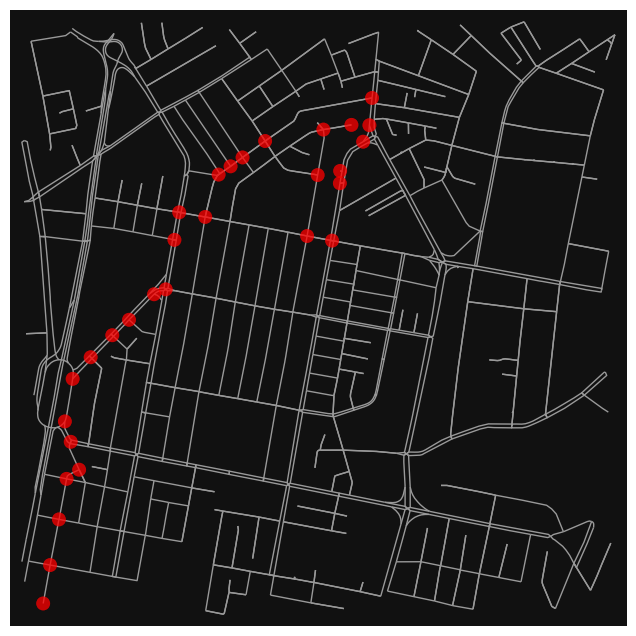

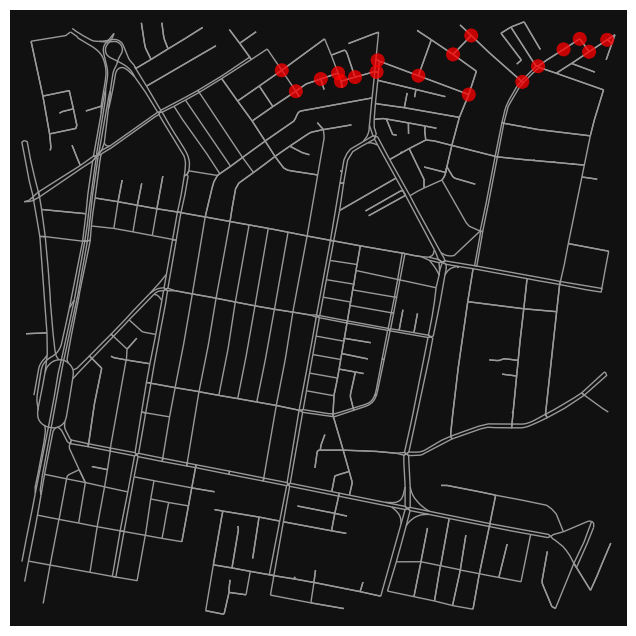

In [8]:
# plotting the shotrtest path given by netwrokX 
functions.plot_path( agents[0].ruta , agents[0].final_node,  G )
functions.plot_path( agents[1].ruta , agents[1].final_node,  G )

In [9]:
# el agente 0 se demoro  (6, 43)
# el agente 1 se demoro  (3, 39)

# el agente 0 se demoro  (6, 51)
# el agente 1 se demoro  (3, 43)


# el agente 0 se demoro  (6, 24)
# el agente 1 se demoro  (3, 39)

# el agente 0 se demoro  (7, 0)
# el agente 1 se demoro  (3, 36)


finish_agents



{1: 422, 0: 866}